# Neural Networks 

Now we will learn to implement Neural Networks for binary classification. We will do this in three steps :-
1. Implementing without using any library
2. Implementing using Tensorflow library
3. Implementing using Pytorch library

## Implementing Neural Networks without using any library

Here, we will only use numpy and other python libraries like pandas to implement Neural Networks. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
data.columns = ["times_pregnant",'plasma_glucose_conc','BP','tricep_thickness','serum_insulin',"body_mass_index",'diabetes_pedigree_func','Age','class']
data.head(10)

,times_pregnant,plasma_glucose_conc,BP,tricep_thickness,serum_insulin,body_mass_index,diabetes_pedigree_func,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
train_data = data.sample(frac = 0.75, random_state = 1)
test_data = data.drop(train_data.index)
x_train,y_train = train_data.iloc[:,:-1],train_data.iloc[:,-1]
x_test,y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [ ]:
class neuron_layer :
  def __init__(self,n1,n2):
    # n1 is the number of neurons in the previous layers while n2 is the number of neurons in the current layer
    np.random.seed(12)
    self.weights = np.random.randn(n1,n2)
    self.bias = np.zeros((1,n2))

  def predict(self,x): 
    output = np.matmul(x,self.weights) + self.bias
    output = 1/(1+np.exp(output))
    return output

  def train(self, y,output,x ,weights):
    len = y.shape[0]
    dw = np.zeros_like(self.weights)
    grad = np.zeros_like(self.weights)
    for i in range(len):
      d = output[i] - y[i]
      for p in range(dw.shape[0]):
        for q in range(dw.shape[1]):
           dw[p][q] = d*weights[q]*x[i,p]
      grad = grad + dw
    
    self.weights = self.weights - (lr/len)*grad


We will create a two layer Neural Network out of which we will have 1 hidden layer and 1 output layer. Let the number of neurons in the hidden layer be 5. And the output layer will contain only one neuron to classify the output.

In [ ]:
# defining hyper-parameters for the model
epochs = 200
lr = 0.001
train_accuracy,train_loss = [],[]
test_accuracy, test_loss = [],[]

In [ ]:
def predict_class(pred):
  z = (pred >= 0.5)*1
  return z

def evaluate_loss(y, y_pred):
  loss = -y*(np.log(y_pred)) - (1 - y)*(np.log(1 - y_pred))
  loss = np.mean(loss)
  return loss

def validate_accuracy(y, y_pred):
  y_pred = predict_class(y_pred)
  accuracy = np.mean(y == y_pred)
  return accuracy*100

In [ ]:
# Defining the two layers of Neural Network
layer1 = neuron_layer(8,5)
layer2 = neuron_layer(5,1)

for epoch in range(epochs):
  output1 = layer1.predict(x_train.values)
  output2 = layer2.predict(output1)
  layer1.train(y_train.values,output2, x_train.values, layer2.weights)
  layer2.train(y_train.values,output2, output1, [1])
  error = evaluate_loss(y_train.values, output2)
  acc = validate_accuracy(y_train.values, output2)
  train_accuracy.append(acc)
  train_loss.append(error)
  print("For {} epoch, the error and accuracy are respectively".format(epoch+1),"{}, {}".format(error, acc) )

  test_pred1 = layer1.predict(x_test.values)
  test_pred2 = layer2.predict(test_pred1)
  test_error = evaluate_loss(y_test.values, test_pred2)
  test_acc = validate_accuracy(y_test.values, test_pred2)
  test_accuracy.append(test_acc)
  test_loss.append(test_error)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


For 1 epoch, the error and accuracy are respectively 1.2892295057741774, 32.47062381852552
For 2 epoch, the error and accuracy are respectively 1.24699245248153, 32.654820415879016
For 3 epoch, the error and accuracy are respectively 1.2022908587104424, 32.96181474480151
For 4 epoch, the error and accuracy are respectively 1.1621743774990536, 33.39160680529301
For 5 epoch, the error and accuracy are respectively 1.1394648194297314, 33.637202268431004
For 6 epoch, the error and accuracy are respectively 1.1192276455337014, 34.0669943289225
For 7 epoch, the error and accuracy are respectively 1.1024057377045873, 34.37398865784499
For 8 epoch, the error and accuracy are respectively 1.0834396785496383, 34.80378071833648
For 9 epoch, the error and accuracy are respectively 1.0572448632406537, 35.66336483931947
For 10 epoch, the error and accuracy are respectively 1.020193667756483, 36.891342155009454
For 11 epoch, the error and accuracy are respectively 0.9890699691941881, 38.8561058601134

Text(0, 0.5, 'Accuracy of the model')

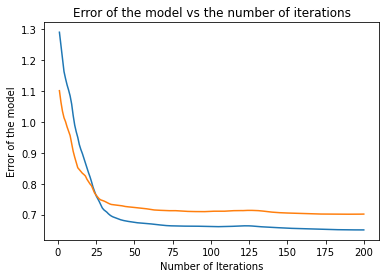

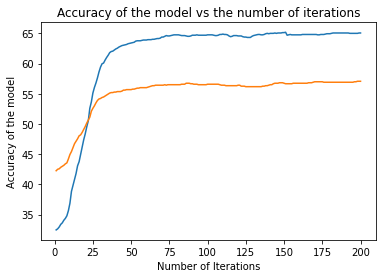

In [ ]:
plt.figure()
plt.title("Error of the model vs the number of iterations")
plt.plot(range(1,201), train_loss, label = "Training Loss")
plt.plot(range(1,201), test_loss, label = "Testing Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Error of the model")

plt.figure()
plt.title("Accuracy of the model vs the number of iterations")
plt.plot(range(1,201), train_accuracy, label = 'Training Accuracy')
plt.plot(range(1,201), test_accuracy, label = 'Testing Accuracy')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy of the model")

As we can see from the above two graphs the training loss is considerably less than the validation loss also the training accuracy is more than the testing accuracy. This indicates that the model is overfitting. This may be because of the fact that we have only 767 examples in the dataset and we have a lot of training parameters in the neural network. To solve this we can gather more training examples or apply regularization.

## Implementing Neural Network in TensorFlow 

In this section, we will implement Neural Network in Tensorflow library.
For this purpose, we will first imort all the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
data.columns = ["times_pregnant",'plasma_glucose_conc','BP','tricep_thickness','serum_insulin',"body_mass_index",'diabetes_pedigree_func','Age','class']
data.head(10)

,times_pregnant,plasma_glucose_conc,BP,tricep_thickness,serum_insulin,body_mass_index,diabetes_pedigree_func,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
batch_size = 100
epoch = 100

In [ ]:
train_data = data.sample(frac = 0.75, random_state = 1)
test_data = data.drop(train_data.index)
x_train, y_train = tf.convert_to_tensor(train_data.iloc[:,:-1], dtype = tf.float32), tf.convert_to_tensor(train_data.iloc[:,-1], dtype = tf.float32)
x_test, y_test = tf.convert_to_tensor(test_data.iloc[:,:-1],dtype = tf.float32),tf.convert_to_tensor(test_data.iloc[:,-1],dtype = tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = x_train.shape[0]).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset= test_dataset.shuffle(buffer_size = x_test.shape[0]).batch(batch_size)

In [ ]:
model = keras.Sequential([keras.layers.Dense(units = 5, activation = 'sigmoid'), keras.layers.Dense(units = 1, activation = 'sigmoid')])

model.compile(optimizer = 'adam', loss = tf.nn.sigmoid_cross_entropy_with_logits, metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch, validation_data = (x_test,y_test))

Epoch 1/100
6/6 [==============================] - 1s 29ms/step - loss: 0.7969 - accuracy: 0.5217 - val_loss: 0.7500 - val_accuracy: 0.5156
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7920 - accuracy: 0.5409 - val_loss: 0.7470 - val_accuracy: 0.5312
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7880 - accuracy: 0.5565 - val_loss: 0.7445 - val_accuracy: 0.5573
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7841 - accuracy: 0.5965 - val_loss: 0.7421 - val_accuracy: 0.5625
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7803 - accuracy: 0.6087 - val_loss: 0.7401 - val_accuracy: 0.5469
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7770 - accuracy: 0.6348 - val_loss: 0.7386 - val_accuracy: 0.5573
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7737 - accuracy: 0.6435 - val_loss: 0.7373 - val_accuracy: 0.5729
Epoch 8/100
6/6 [=========

In [ ]:
train_loss = history.history['loss']
train_accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Accuracy of the model')

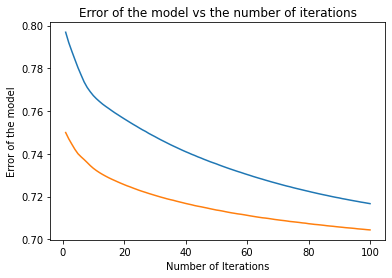

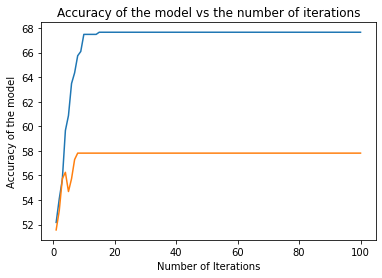

In [ ]:
plt.figure()
plt.title("Error of the model vs the number of iterations")
plt.plot(range(1,101), train_loss, label = "Training Loss")
plt.plot(range(1,101), val_loss, label = "Testing Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Error of the model")

plt.figure()
plt.title("Accuracy of the model vs the number of iterations")
plt.plot(range(1,101), np.array(train_accuracy)*100, label = 'Training Accuracy')
plt.plot(range(1,101), np.array(val_accuracy)*100, label = 'Testing Accuracy')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy of the model")

## Implementing Neural Networks in Pytorch 

Now we will implement Neural Networks in Pytorch 

In [102]:
# Importing the required libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets

In [103]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
data.columns = ["times_pregnant",'plasma_glucose_conc','BP','tricep_thickness','serum_insulin',"body_mass_index",'diabetes_pedigree_func','Age','class']
data.head(10)

,times_pregnant,plasma_glucose_conc,BP,tricep_thickness,serum_insulin,body_mass_index,diabetes_pedigree_func,Age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [104]:
no_examples  = int(len(data)/1.5)
train_x, train_y = torch.tensor(data.iloc[:no_examples,:-1].values, dtype = torch.float32),torch.tensor(data.iloc[:no_examples,-1].values, dtype = torch.float32)
test_x, test_y = torch.tensor(data.iloc[no_examples:,:-1].values, dtype = torch.float32),torch.tensor(data.iloc[no_examples:,-1].values, dtype = torch.float32)

In [105]:
class neuralnet(nn.Module):

  def __init__(self):
    super(neuralnet,self).__init__()
    self.layer1  =  nn.Linear(8,5)
    self.layer2 = nn.Linear(5,1)

  def forward(self,x):
    sigmoid = nn.Sigmoid()
    y = sigmoid(self.layer1(x))
    z = sigmoid(self.layer2(y))
    return z

In [106]:
# First we will form a Custom Dataset for the training data as well as Testing Data

class CustomDataset(Dataset):

  def __init__(self,features,target):
    self.features = features
    self.target = target

  def __len__(self):
    return len(self.target)

  def __getitem__(self,idx):
    return self.features[idx],self.target[idx]


In [107]:
train_data = CustomDataset(train_x, train_y)
test_data = CustomDataset(test_x, test_y)

# It's time to create a DataLoader object
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [108]:
# Let's make a optimizer, model and loss object along with tuning of the hyperparameters
epochs = 100
lr = 0.001
model = neuralnet()
optim = torch.optim.Adam(model.parameters(), lr = lr)
loss = nn.BCELoss()
training_loss, testing_loss = [],[]
training_accuracy, testing_accuracy = [],[]

In [109]:
def predict_acc(output, target):
  pred = (output >= 0.5)*1
  array = [int(i) for i in (target == pred)]
  acc = np.array(array).mean()
  return acc

In [110]:
#training the model

for epoch in range(epochs):
   batch_loss, batch_acc = [],[]
   test_loss, test_acc = [],[]
   for batch_idx,(features, target) in enumerate(train_dataloader):
     optim.zero_grad()
     output = torch.squeeze(model(features),1)
 #    target = target.type(torch.LongTensor)
  #   output = output.type(torch.LongTensor)
     train_loss = loss(output, target)
     train_loss.backward()
     optim.step()
     batch_loss.append(train_loss.detach().numpy())
     acc = predict_acc(output, target)
     batch_acc.append(acc)
   
   for batch_idx, (input,target) in enumerate(test_dataloader):
     out = model(input)
     out = torch.squeeze(out, 1)
     loss1 = loss(out, target)
     test_loss.append(loss1.detach().numpy())
     test_acc.append(predict_acc(out, target))

   training_loss.append(np.array(batch_loss).mean())
   training_accuracy.append(np.array(batch_acc).mean())
   testing_loss.append(np.array(test_loss).mean())
   testing_accuracy.append(np.array(test_acc).mean())



Text(0, 0.5, 'Accuracy of the model')

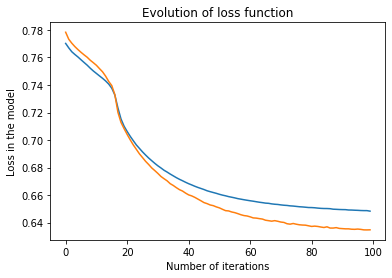

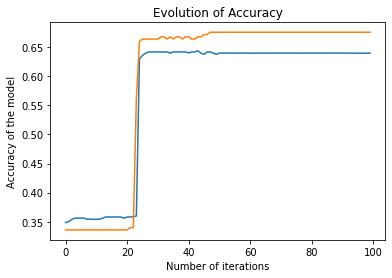

In [111]:
plt.figure()
plt.title("Evolution of loss function")
plt.plot(range(epochs),training_loss, label = "Training Loss")
plt.plot(range(epochs), testing_loss, label = "Testing loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss in the model")

plt.figure()
plt.title("Evolution of Accuracy")
plt.plot(range(epochs), training_accuracy, label = "Training Accuracy")
plt.plot(range(epochs), testing_accuracy, label = "Testing Accuracy")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy of the model")